In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
from jax import random
import jax.numpy as jnp
from model import predict, init_network_params
from run import train
import gym
import matplotlib.pyplot as plt
import numpy as np

In [115]:
env = gym.make('CartPole-v0')

In [140]:
key = random.PRNGKey(0)

In [150]:
c = random.normal(key, (10,))

In [152]:
c * 100

DeviceArray([-37.211098,  26.423105, -18.252773, -73.681984, -44.030388,
             -15.214427, -67.13536 , -59.08642 ,  73.16888 ,  56.73025 ],            dtype=float32)

In [158]:
b = jnp.array([50])

In [161]:
(b > 10).all()

DeviceArray(True, dtype=bool)

In [162]:
b = [1,2,3,4]

In [163]:
jnp.mean(b)

TypeError: mean requires ndarray or scalar arguments, got <class 'list'> at position 0.

In [156]:
jnp.clip(c * 100, a_max = 10)

DeviceArray([-37.211098,  10.      , -18.252773, -73.681984, -44.030388,
             -15.214427, -67.13536 , -59.08642 ,  10.      ,  10.      ],            dtype=float32)

In [153]:
jnp.min(c, 50)

ValueError: axis 50 is out of bounds for array of dimension 1

In [124]:
np.random.seed(0)

In [138]:
env.seed(0)

[0]

In [139]:
env.reset()

array([-0.04456399,  0.04653909,  0.01326909, -0.02099827])

In [129]:
env.reset()

array([-0.03975157,  0.01730763, -0.01074233,  0.01698461])

In [40]:
rewards, losses, agent = train(env, train_eps=200)

Initializing model with layers [4, 32, 32, 2]
Testing: Episode 0, Reward 18.0, Epsilon 0.9910
Testing: Episode 1, Reward 12.0, Epsilon 0.9851
Testing: Episode 2, Reward 25.0, Epsilon 0.9729
Testing: Episode 3, Reward 14.0, Epsilon 0.9661
Testing: Episode 4, Reward 11.0, Epsilon 0.9608
Testing: Episode 5, Reward 15.0, Epsilon 0.9536
Testing: Episode 6, Reward 30.0, Epsilon 0.9394, Loss 1.691152
Testing: Episode 7, Reward 10.0, Epsilon 0.9347, Loss 1.799410
Testing: Episode 8, Reward 13.0, Epsilon 0.9287, Loss 1.503127
Testing: Episode 9, Reward 48.0, Epsilon 0.9066, Loss 1.516044
Testing: Episode 10, Reward 18.0, Epsilon 0.8985, Loss 1.466211
Testing: Episode 11, Reward 19.0, Epsilon 0.8900, Loss 1.396105
Testing: Episode 12, Reward 12.0, Epsilon 0.8847, Loss 1.370281
Testing: Episode 13, Reward 27.0, Epsilon 0.8728, Loss 1.386746
Testing: Episode 14, Reward 22.0, Epsilon 0.8633, Loss 1.277598
Testing: Episode 15, Reward 18.0, Epsilon 0.8555, Loss 1.242962
Testing: Episode 16, Reward 10

In [43]:
obs = env.reset()

In [114]:
dir(env)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_elapsed_steps',
 '_max_episode_steps',
 'action_space',
 'class_name',
 'close',
 'compute_reward',
 'env',
 'metadata',
 'observation_space',
 'render',
 'reset',
 'reward_range',
 'seed',
 'spec',
 'step',
 'unwrapped']

In [105]:
env.render()

True

In [109]:
obs = env.step(0)[0]
env.render()

True

In [110]:
agent.predict(obs)

DeviceArray([2.2305984, 2.5463667], dtype=float32)

In [28]:
x = np.random.rand(20, 4)

In [29]:
x = jnp.asarray(x)

In [30]:
from agent import Agent

In [31]:
key = random.PRNGKey(1000)

In [32]:
uagent = Agent([4, 32, 32, 2], key)

Initializing model with layers [4, 32, 32, 2]


In [34]:
uagent.predict(x[0])

DeviceArray([0.329841  , 0.09361423], dtype=float32)

In [36]:
uagent.batched_predict(x)

DeviceArray([[ 0.3298409 ,  0.09361421],
             [-0.42874563, -0.22995716],
             [ 0.21321632, -0.23591785],
             [-0.08000386, -0.22414297],
             [ 0.17752884,  0.12193319],
             [-0.3352107 ,  0.02669756],
             [-0.29525703, -0.27034795],
             [-0.13421106, -0.21420212],
             [-0.27805948, -0.07456517],
             [ 0.0157112 ,  0.02680513],
             [-0.05280811, -0.0605374 ],
             [ 0.17056032,  0.07215367],
             [-0.1272696 , -0.14440769],
             [-0.23381564, -0.17796688],
             [-0.03171363, -0.10209206],
             [-0.17154318, -0.13077003],
             [-0.06845512,  0.03295736],
             [-0.3369526 , -0.31483248],
             [ 0.05345263,  0.09829463],
             [ 0.11145928,  0.09750673]], dtype=float32)

In [17]:
uagent.predict(x[-1])

DeviceArray([-0.01090179, -0.00836683], dtype=float32)

In [35]:
uagent.predict(x[0])

DeviceArray([0.329841  , 0.09361423], dtype=float32)

In [96]:
jnp.std(uagent.params[0][0])

DeviceArray(0.67834383, dtype=float32)

In [30]:
obs = env.reset()

In [31]:
obs = env.step(1)[0]

In [32]:
obs

array([ 0.02904541,  0.19790616, -0.00915288, -0.30301058])

In [38]:
import numpy as np

In [40]:
x = np.random.rand(20, 4)

In [42]:
agent.predict(x[0])

DeviceArray([-0.0178421 ,  0.00229824], dtype=float32)

In [ ]:
jnp.random

In [35]:
obs = jnp.array([10, 10, -10, -10])

In [36]:
agent.predict(obs)

DeviceArray([-0.01795367,  0.00214361], dtype=float32)

In [37]:
agent.params

[(DeviceArray([[-1.95034444e-02,  1.81686059e-02, -6.75984286e-03,
                 1.23280426e-03],
               [ 3.16636666e-04,  1.28108216e-02, -2.86531239e-03,
                 1.17429513e-02],
               [-7.76109146e-03, -2.56922795e-03, -1.66409388e-02,
                 1.01281377e-02],
               [ 8.78192578e-03, -5.21503668e-03, -9.06686997e-04,
                -1.04003297e-02],
               [ 1.66224241e-02, -4.29784064e-04,  9.34034120e-03,
                -1.42266005e-02],
               [ 1.49459846e-03,  2.27145888e-02, -1.12932571e-03,
                 5.38495230e-03],
               [-2.15875101e-03, -6.14423631e-03,  1.08824456e-02,
                 3.42327403e-03],
               [-8.88935756e-03,  1.70176458e-02,  6.56703440e-03,
                 8.00011400e-03],
               [-2.53428938e-03, -1.87184159e-02,  5.33664972e-03,
                 1.55535471e-02],
               [-9.18099377e-03,  2.52251024e-03,  8.77962820e-03,
                 1.31082

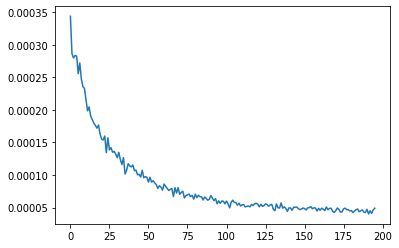

In [8]:
plt.plot(losses)

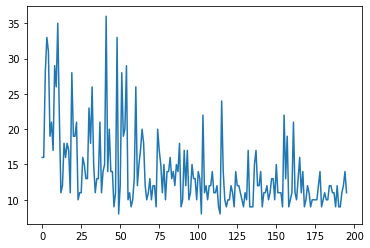

In [9]:
plt.plot(rewards)

In [14]:
obs = env.reset()

In [15]:
action = agent.act(None, obs, explore=False)
obs = env.step(action)

TypeError: _random_bits got invalid prng key.